# Coding an Optical Illusion in Python
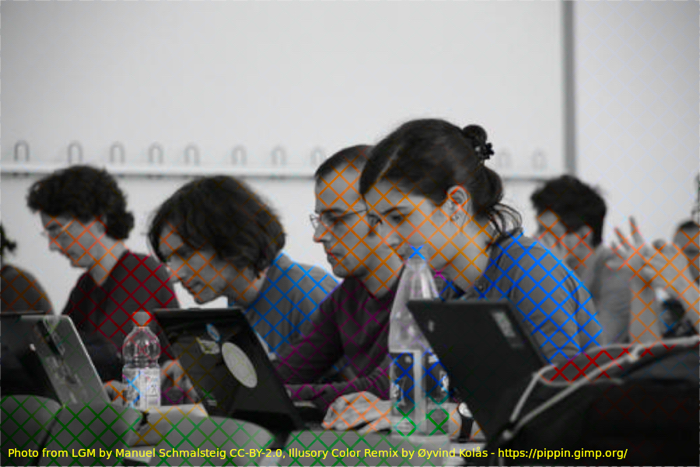

I recently found a cool optical illusion online that makes a black and white image seem colored. It does so by imposing a colored grid on top of the black and white image, tricking your eyes into filling in the rest of the colors. 

## Getting Started
Let's replicate this in python. We'll use the open CV library to convert the color image into black and white, and then draw some grid lines over them.

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Choosing an image
Since we're on google colab, you can either upload an image to the colab filesystem by clicking the folder button on the left sidebar, or run the 
curl command to download an image.

In [17]:
!curl -o input.jpg https://unicun.azureedge.net/wp-content/uploads/2019/03/Lego-Blocks-For-Adults.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 93698  100 93698    0     0  60921      0  0:00:01  0:00:01 --:--:-- 60882


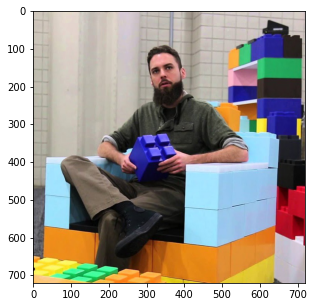

In [56]:
img_path = "input.jpg"
img = plt.imread(img_path)
plt.figure(figsize=(5,5))
plt.imshow(img)

## Converting to black and white
This image is an RGB format array, so the dimensions are (H, W, C).
We'll convert this to black and white using cv2. CV2 actually reads colors as BGR, so we'll have to reverse the channels. 

Also, since the black and white images is 1 channel, but we want to draw colored
lines onto the black and white image, we'll have to convert it back to 3 channel.

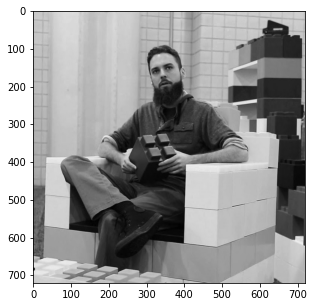

In [59]:
bw_img = cv2.cvtColor(img[:,:,::-1], cv2.COLOR_BGR2GRAY) # reverse RGB to BGR before giving to CV2
bw_img = cv2.cvtColor(bw_img, cv2.COLOR_GRAY2BGR) # go back to 3 channel
plt.figure(figsize=(5,5))
plt.imshow(bw_img, cmap='Greys_r')

## Drawing the grid lines
Finally, here is where the magic happens. We'll draw grid lines over the image.
You can play with the number of lines in the x and y dimension of the grid with the `grid_x_dim` and `grid_y_dim` parameters. Increasing the number of lines in the grid will generally make the image look more colorful.

You can also control the thickness of the line.

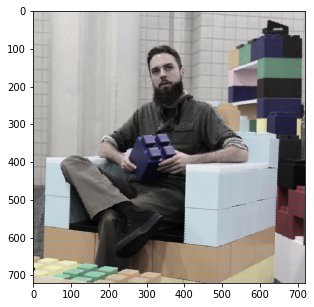

In [60]:
grid_img = bw_img.copy()
H, W, C = grid_img.shape
grid_x_dim = 100
grid_y_dim = 100
thickness = 1


line_width = W / grid_x_dim
line_height = H / grid_y_dim

# draw vertical lines
for i in range(grid_x_dim):
    for j in range(grid_y_dim):
        start_x, start_y = int(i * line_width), int(j * line_height)
        end_x, end_y = int(i * line_width), int((j+1) * line_height)
        # determine the color
        mid_x = int(start_x + 0.5*(end_x - start_x))
        mid_y = int(start_y + 0.5*(end_y - start_y))
        mid_color = img[mid_y, mid_x, :].tolist() # row by column, so y, x
        color = mid_color
        cv2.line(grid_img,  (start_x, start_y), (end_x, end_y), color, thickness, 1)

# draw horizontal lines
for i in range(grid_y_dim):
    for j in range(grid_x_dim):
        start_x, start_y =  int(j * line_width), int(i * line_height)
        end_x, end_y =  int((j+1) * line_width), int(i * line_height)
        # determine the color
        mid_x = int(start_x + 0.5*(end_x - start_x))
        mid_y = int(start_y + 0.5*(end_y - start_y))
        mid_color = img[mid_y, mid_x, :].tolist() # row by column, so y, x
        color = mid_color
        cv2.line(grid_img,  (start_x, start_y), (end_x, end_y), color, thickness, 1)
plt.figure(figsize=(5,5))
plt.imshow(grid_img)

Let's compare the images side by side. As you can see, the illusion isn't as vibrant as the original image, but it sure doesn't look black and white!

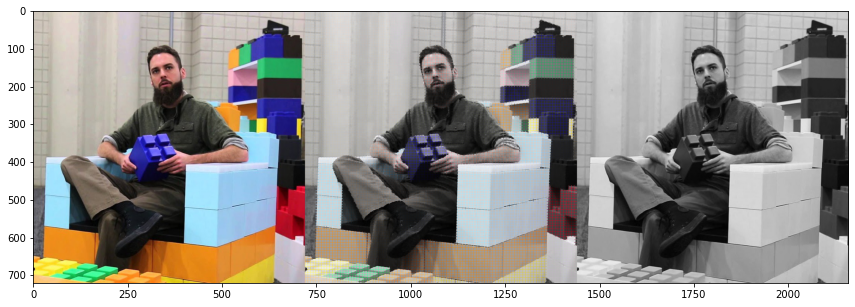

In [61]:
all_img = np.concatenate([img, grid_img, bw_img], axis=1)
plt.figure(figsize=(15,5))
plt.imshow(all_img)

## Code for Optical Illusion
Finally, here is some self contained code for doing everything above.

In [51]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def optical_illusion(img_path, grid_dim=(75, 75), line_thickness=3, show_all=False):
    """
    img_path: path of the input image
    grid_dim: dimensions of the grid
    line_thickness: thickness of each line
    show_all: render input image, optical illusion, and bw image side by side.

    Converts RGB image into BW image, and then draws colored grid lines over them.
    You can tune the grid dimensions, as well as the thickness of each line.
    """
    grid_x_dim, grid_y_dim = grid_dim
    thickness = line_thickness
    
    img = plt.imread(img_path)
    bw_img = cv2.cvtColor(img[:,:,::-1], cv2.COLOR_BGR2GRAY)
    bw_img = cv2.cvtColor(bw_img, cv2.COLOR_GRAY2BGR)
    grid_img = bw_img.copy()
    W,H,C = grid_img.shape
  

    line_width = H / grid_x_dim
    line_height = W / grid_y_dim

    # draw vertical lines
    for i in range(grid_x_dim-1):
        for j in range(grid_y_dim-1):
            start_x, start_y = int(i * line_width), int(j * line_height)
            end_x, end_y = int(i * line_width), int((j+1) * line_height)
            # determine the color
            mid_x = int(start_x + 0.5*(end_x - start_x))
            mid_y = int(start_y + 0.5*(end_y - start_y))
            mid_color = img[mid_y, mid_x, :].tolist() # row by column, so y, x
            color = mid_color
            cv2.line(grid_img,  (start_x, start_y), (end_x, end_y), color, thickness, 1)

    # draw horizontal lines
    for i in range(grid_y_dim-1):
        for j in range(grid_x_dim-1):
            start_x, start_y =  int(j * line_width), int(i * line_height)
            end_x, end_y =  int((j+1) * line_width), int(i * line_height)
            # determine the color
            mid_x = int(start_x + 0.5*(end_x - start_x))
            mid_y = int(start_y + 0.5*(end_y - start_y))
            mid_color = img[mid_y, mid_x, :].tolist() # row by column, so y, x
            color = mid_color
            cv2.line(grid_img,  (start_x, start_y), (end_x, end_y), color, thickness, 1)
    
    save_img = grid_img
    if show_all:
        save_img = np.concatenate([img, grid_img, bw_img], axis=1)
    return save_img


In [40]:
# let's explore some more images!
!curl -o minecraft.jpg  https://www.xboxone-hq.com/images/games/screenshots/35-minecraft-xbox-one-edition-screenshot-1421916887.jpg
!curl -o astroworld.jpg  https://upload.wikimedia.org/wikipedia/en/0/0b/Astroworld_by_Travis_Scott.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  146k  100  146k    0     0   113k      0  0:00:01  0:00:01 --:--:--  113k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  127k  100  127k    0     0   227k      0 --:--:-- --:--:-- --:--:--  226k


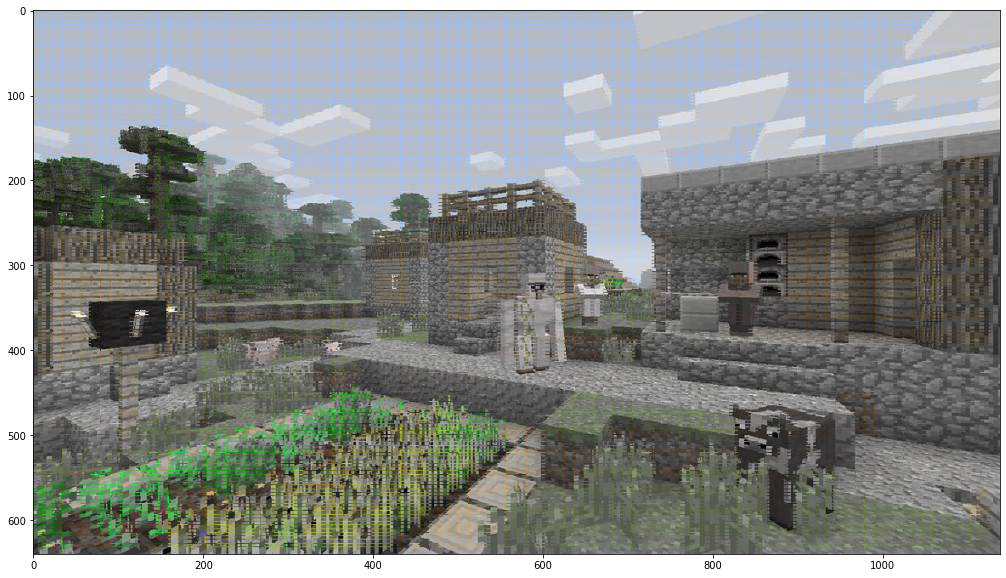

In [65]:
img = optical_illusion("minecraft.jpg", grid_dim=(100, 150), line_thickness=1, show_all=False)
plt.figure(figsize=(20,10))
plt.imshow(img)

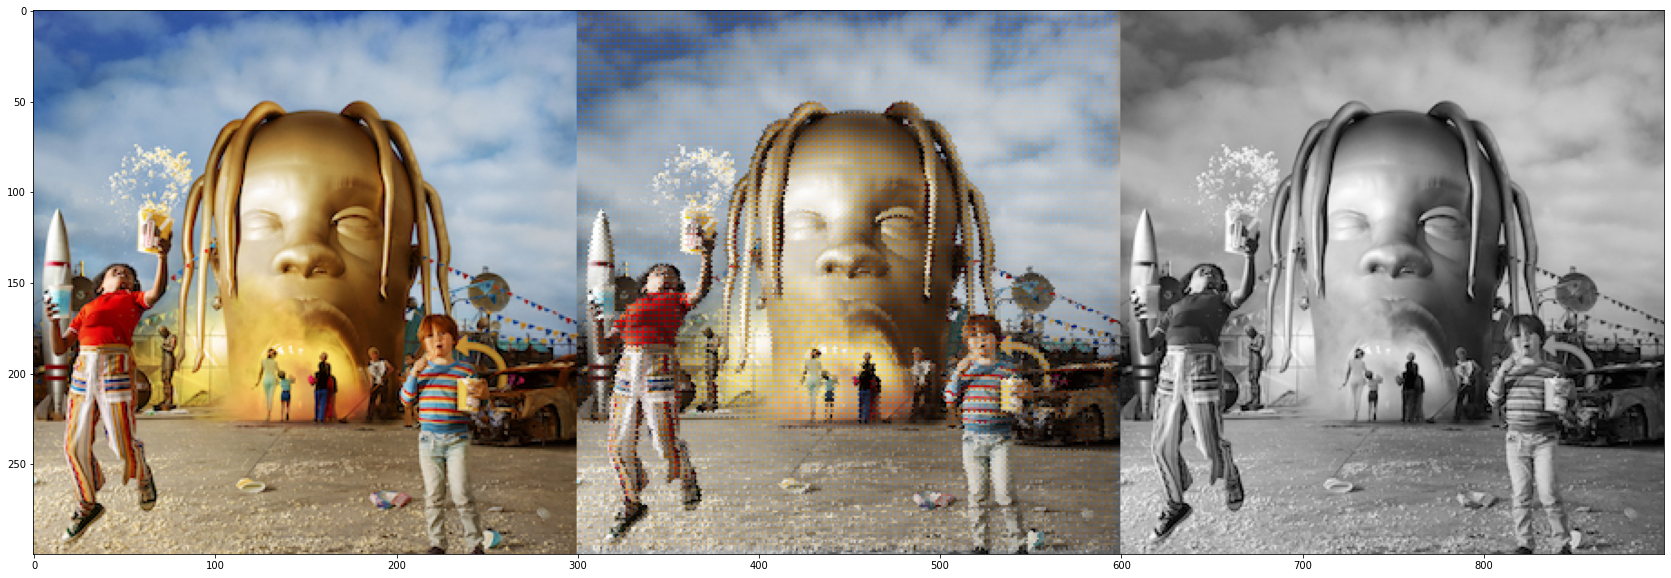

In [67]:
img = optical_illusion("astroworld.jpg", grid_dim=(100, 100), line_thickness=1, show_all=True)
plt.figure(figsize=(30,10))
plt.imshow(img)